In [15]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Load the MATLAB file
# fileloc = '../data/2019/105l001p16.mat'
# fileloc = '../data/2019/106r001p26.mat'
# fileloc = '../data/2019/106r002p70.mat'
fileloc = '../data/2019/107l002p67.mat'
# fileloc = '../data/2019/107l003p143.mat'
matlab_data = scipy.io.loadmat(fileloc)

In [17]:
# print the keys of the dictionary
matlab_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'neuralData'])

In [18]:
stim = matlab_data['neuralData'][0, 0][1].squeeze()
# remove the blank trials from stim
stim = stim[0::2]

spikes1 = []
spikes2 = []
for i in range(len(stim)):
    spikes1.append(matlab_data['neuralData'][0, 0][0][2*i + 1, 0].toarray().astype(np.int8))
    spikes2.append(matlab_data['neuralData'][0, 0][0][2*i + 1, 1].toarray().astype(np.int8))

In [19]:
stim

array([3, 7, 5, ..., 2, 1, 3], dtype=uint8)

In [20]:
spikes1[0].shape

(97, 1500)

In [21]:
spikes1= np.stack(spikes1)
spikes2= np.stack(spikes2)

In [22]:
spikes1.shape

(3200, 97, 1500)

In [23]:
spikes2.shape

(3200, 31, 1500)

### Now we check the fano factors across different trials of the same type

In [24]:
stim_indices = {}
for i in range(1, 9):
    stim_indices[i] = np.where(stim == i)[0]

In [25]:
all_data = spikes1
# all_data = spikes2
print(all_data.shape)

mean_spike_counts = []
var_spike_counts = []

for i in range(1,9):
    mean_spike_counts.append(np.mean(np.sum(all_data[stim_indices[i], :, :], axis=2), axis=0))
    var_spike_counts.append(np.var(np.sum(all_data[stim_indices[i], :, :], axis=2), axis=0))

mean_spike_counts = np.array(mean_spike_counts).flatten()
var_spike_counts = np.array(var_spike_counts).flatten()

# print shapes
print(mean_spike_counts.shape)
print(var_spike_counts.shape)

(3200, 97, 1500)
(776,)
(776,)


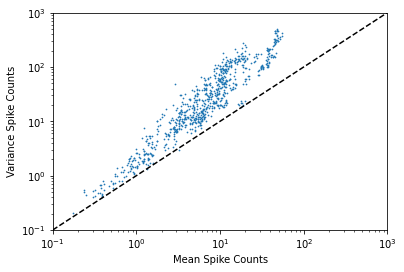

In [28]:
# scatter plot of mean on x axis and variance on y axis alomg with the line y=x in loglog
plt.scatter(mean_spike_counts, var_spike_counts, s=0.5)  # Reduced point size
plt.xscale('log')
plt.yscale('log')
plt.plot([0.1, 1000], [0.1, 1000], '--k')
plt.xlim(0.1, 1000)
plt.ylim(0.1, 1000)
plt.xlabel('Mean Spike Counts')
plt.ylabel('Variance Spike Counts')
plt.show()

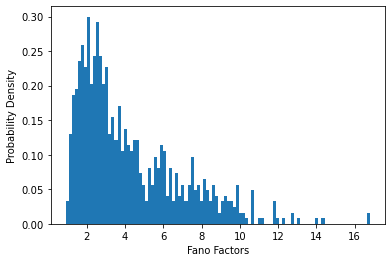

In [29]:
# calculate and plot the probability density of fano factors
fano_factors = var_spike_counts / mean_spike_counts
plt.hist(fano_factors, bins=100, density=True)
plt.xlabel('Fano Factors')
plt.ylabel('Probability Density')
plt.show()

In [14]:
# print the mean of fano factors
print(np.mean(fano_factors))

# print the geometric mean of fano factors
print(np.exp(np.mean(np.log(fano_factors))))

4.53564850659935
3.570820341677636
